In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# $$ P(A|B) = P(AB)/P(B) $$
# $ 在 B 条件下 A 的概率.$
# $ 即事件A 在另外一个事件B已经发生条件下的发生概率。$

# 统计概率函数

In [35]:
def prob(X):
    m = np.ravel(X).shape[0]
    return {x:(np.ravel(X)==x).dot(np.ones(m))/m for x in np.unique(X)}

## 案例： 下面是一个完整的测试结果编码

In [36]:
allset = np.array([0,0,1,1,0,1,1])
allset

array([0, 0, 1, 1, 0, 1, 1])

## 把样本分成两份
## 
## 求: 假如随机从两份样本里抽一个结果,那么抽到假的概率是多少？

In [37]:
np.random.seed()
np.random.randint(2,allset.size)
B = allset[4:]
A = allset[:4]
B.shape,A.shape

((3,), (4,))

## $先计算 P(AB)$

In [38]:
PAB = (B == 0).sum()/allset.size
{"PAB":PAB,"B = 0 counter":(B == 0).sum(),"all counter":allset.size}

{'PAB': 0.14285714285714285, 'B = 0 counter': 1, 'all counter': 7}

## $ 再计算P(B) $

In [39]:
PB = B.size/allset.size
{"PB":PB,"B counter":B.size,"all counter":allset.size}

{'PB': 0.42857142857142855, 'B counter': 3, 'all counter': 7}

## 则 $ P(A|B) $ 等于

In [40]:
{"P(A|B)":PAB/PB}

{'P(A|B)': 0.3333333333333333}

# 整理成函数

In [41]:
import numexpr as en
import numpy as np

def conditional_probability(A,B,*symbol,**cond):
    #初始化参数
    allset = np.hstack((A,B))
    _init_ = cond
    symbol = _init_["symbol"]
    cond = _init_['cond']
    m = allset.size
    bm = B.size

    #创建表达式
    symbolPAB = "{}{}{}".format("B",symbol,str(cond))

    #评估表达式
    PAB = en.evaluate(symbolPAB).sum()/m

    PB = bm/m
    return PAB/PB

In [42]:
conditional_probability(A,B,symbol='==',cond=0)

0.3333333333333333

# 單次抽樣

In [43]:
def sample_program(n):
    expr = lambda : [A[np.random.randint(0,4)],B[np.random.randint(0,3)]][np.random.randint(1)]
    List = [np.inf]
    while List[-1] != n:
        List.append(expr())     
    return np.array(List[1:])
sample_program(0).size

5

# 重複抽樣次數

In [44]:
def duplicate_sampling(n):
    List = []
    for i in range(1,n+1):
        mu = 1-1/sample_program(0).size 
        List.append(mu)
    return List
sum(duplicate_sampling(8))/8

0.3697916666666667

# 连续重复抽样，查看是否向条件概率的值回归

In [45]:
Time_mu = np.array([sum(duplicate_sampling(i))/i for i in range(1,3000)])

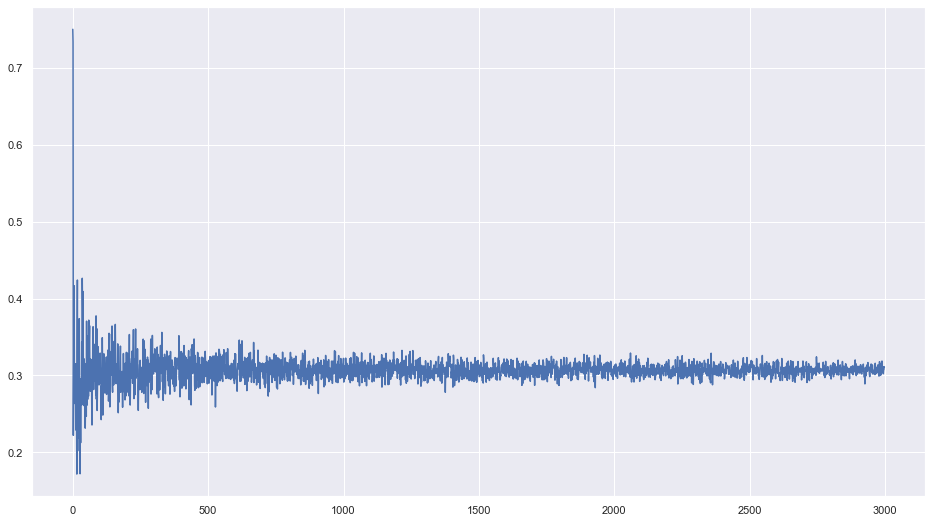

In [46]:
plt.figure(figsize=(16,9))
plt.plot(Time_mu)

# 3 西格玛检验测试结果是否正太分布

In [47]:
def three_sigm_criteria(normalx):
    mu = normalx.mean()
    std = normalx.std()
    test_normal_stmp = lambda n : normalx[(normalx>(mu-n*std))==(normalx<(mu+n*std))].shape[0]/normalx.shape[0]
    calculate = {"{}{}{}".format("±",str(i),"Sigma"):(test_normal_stmp(i),test_normal_stmp(i)>j) for i,j in zip(range(1,4),(0.6526,0.9544,0.9974))}
    return calculate

In [48]:
three_sigm_criteria(Time_mu)

{'±1Sigma': (0.8936312104034678, True),
 '±2Sigma': (0.9733244414804935, True),
 '±3Sigma': (0.9893297765921975, False)}

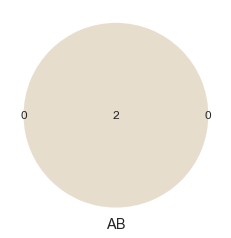

In [49]:
from matplotlib_venn import venn2
venn2(subsets=[set(A),set(B)],set_labels=("A","B"),set_colors=("r","g"))